In [11]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import resample
import matplotlib.pyplot as plt
import numpy as np

In [12]:
# Carrega o dataset (supondo que ele esteja em um arquivo CSV)
df = pd.read_csv('data/all.csv')

# Separa os parâmetros (features) e o diagnóstico (alvo)
parameters = df.iloc[:, :-1]
diagnosis = df.iloc[:, -1]

In [13]:
# Cria o classificador Naive Bayes
clf = GaussianNB()

# Define o número de iterações para o bootstrap
n_iterations = 1000
sample_size = int(0.7 * len(df))  # 70% dos dados para cada amostra bootstrap
bootstrap_scores = []

for _ in range(n_iterations):
  parameters_sample, diagnosis_sample = resample(parameters, diagnosis, n_samples=sample_size, random_state=None)
  clf.fit(parameters_sample, diagnosis_sample)
  accuracy = clf.score(parameters, diagnosis)
  bootstrap_scores.append(accuracy)

# Converte para array numpy
bootstrap_scores = np.array(bootstrap_scores)

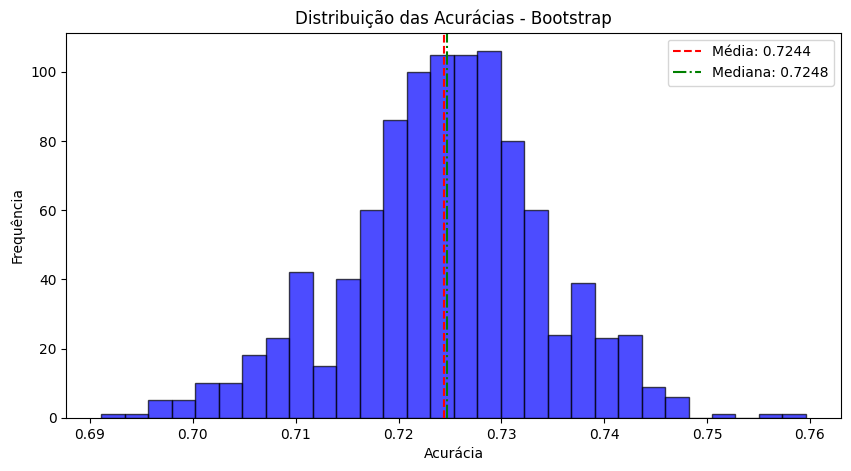

In [14]:
# Plota a distribuição das acurácias
plt.figure(figsize=(10, 5))
plt.hist(bootstrap_scores, bins=30, alpha=0.7, color='blue', edgecolor='black')
plt.axvline(bootstrap_scores.mean(), color='red', linestyle='--', label=f'Média: {bootstrap_scores.mean():.4f}')
plt.axvline(np.median(bootstrap_scores), color='green', linestyle='-.', label=f'Mediana: {np.median(bootstrap_scores):.4f}')
plt.xlabel('Acurácia')
plt.ylabel('Frequência')
plt.title('Distribuição das Acurácias - Bootstrap')
plt.legend()
plt.show()

C:\Users\DaviD\AppData\Local\Temp\ipykernel_5468\743295570.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(all_scores, labels=[f'{int(s)}' for s in sample_sizes])


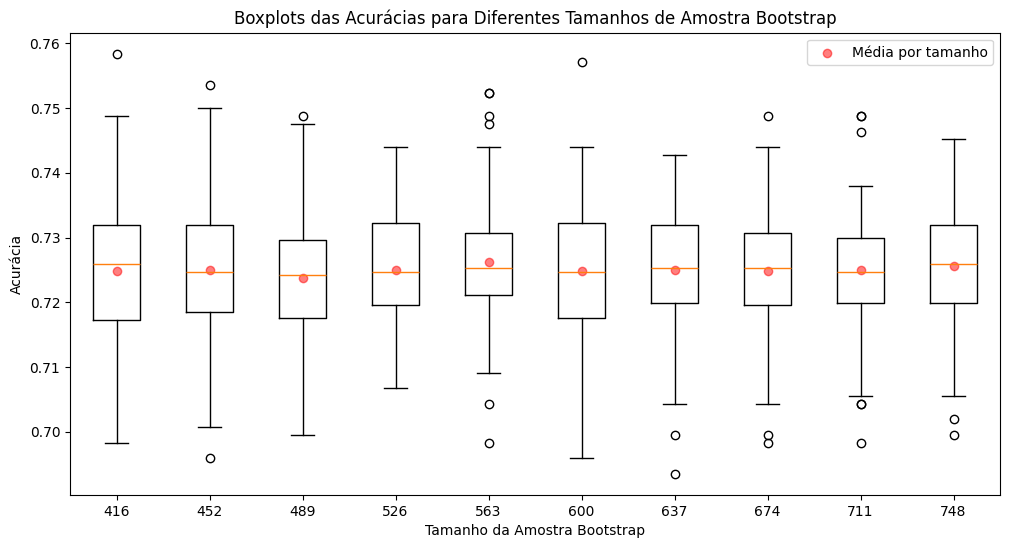

In [15]:
# Gera box plots para diferentes tamanhos de amostra bootstrap
sample_sizes = np.linspace(0.5, 0.9, 10) * len(df)
all_scores = []
means = []

for size in sample_sizes:
  scores = []
  for _ in range(100):
    parameters_sample, diagnosis_sample = resample(parameters, diagnosis, n_samples=int(size), random_state=None)
    clf.fit(parameters_sample, diagnosis_sample)
    scores.append(clf.score(parameters, diagnosis))
  all_scores.append(scores)
  means.append(np.mean(scores))

plt.figure(figsize=(12, 6))
plt.boxplot(all_scores, labels=[f'{int(s)}' for s in sample_sizes])
plt.scatter(range(1, len(sample_sizes) + 1), means, color='red', alpha=0.5, label='Média por tamanho')
plt.xlabel('Tamanho da Amostra Bootstrap')
plt.ylabel('Acurácia')
plt.title('Boxplots das Acurácias para Diferentes Tamanhos de Amostra Bootstrap')
plt.legend()
plt.show()
